# ***Data preparation*** 

1. Data integration
2. Eliminate irrelevant and redundant variables
3. Statistical description of the data
4. Data cleaning: outliers and nulls
5. Correlation analysis: redundancies among all the variables and irrelevancies with respect to the target variable
6. Data balancing (if necessary)
7. Transformation of variable type according to ML method.
8. Save prepared data

In [84]:
import pandas as pd # Dataframe manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Graphics

# ***1. Data integration***

***The data is already complete in a table***.

In [85]:
# Table data is loaded
data = pd.read_csv("../Data/final_depression_dataset.csv")
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [87]:
# Correction of data type object to categories
data['Name'] = data['Name'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['City'] = data['City'].astype('category')
data['Working Professional or Student'] = data['Working Professional or Student'].astype('category')
data['Profession'] = data['Profession'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Sleep Duration'] = data['Sleep Duration'].astype('category')
data['Dietary Habits'] = data['Dietary Habits'].astype('category')
data['Degree'] = data['Degree'].astype('category')
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].astype('category')
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].astype('category')
data['Depression'] = data['Depression'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Name                                   2556 non-null   category
 1   Gender                                 2556 non-null   category
 2   Age                                    2556 non-null   int64   
 3   City                                   2556 non-null   category
 4   Working Professional or Student        2556 non-null   category
 5   Profession                             1883 non-null   category
 6   Academic Pressure                      502 non-null    category
 7   Work Pressure                          2054 non-null   category
 8   CGPA                                   502 non-null    float64 
 9   Study Satisfaction                     502 non-null    category
 10  Job Satisfaction                       2054 non-null   categ

# ***2. Eliminate irrelevant and redundant variables***

In [88]:
# Irrelevant variables for the mining process
data = data.drop(['Name'], axis=1) # Axis = 1 to delete the column
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [89]:
data.sample(8)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1144,Male,25,Kanpur,Student,NaN,4.0,NaN,6.25,2.0,NaN,Less than 5 hours,Moderate,Class 12,No,1,3,Yes,Yes
974,Female,28,Vadodara,Student,NaN,4.0,NaN,7.70,4.0,NaN,Less than 5 hours,Moderate,BA,No,2,1,No,No
1251,Male,31,Kalyan,Working Professional,Finanancial Analyst,NaN,5.0,NaN,NaN,5.0,5-6 hours,Unhealthy,BCA,Yes,12,2,Yes,Yes
2196,Female,36,Indore,Working Professional,Chemist,NaN,2.0,NaN,NaN,2.0,5-6 hours,Unhealthy,MD,No,3,3,No,No
2430,Male,28,Mumbai,Working Professional,Doctor,NaN,1.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,M.Pharm,Yes,10,3,No,No
1096,Male,43,Varanasi,Working Professional,Teacher,NaN,2.0,NaN,NaN,2.0,5-6 hours,Moderate,MA,No,8,1,No,No
2550,Female,45,Srinagar,Working Professional,Teacher,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Healthy,LLM,Yes,2,5,Yes,No
343,Male,56,Patna,Working Professional,Pharmacist,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Pharm,Yes,9,5,Yes,No


# ***3. Statistical description of the data***

In [90]:
# Let's get to know a little bit of the numerical data
data.describe()

,Age,CGPA,Work/Study Hours
count,2556.000000,502.000000,2556.000000
mean,39.043036,7.567809,6.023865
std,12.260596,1.465367,3.771743
min,18.000000,5.030000,0.000000
25%,28.000000,6.210000,3.000000
50%,39.000000,7.605000,6.000000
75%,50.000000,8.825000,9.000000
max,60.000000,10.000000,12.000000


In [91]:
from ydata_profiling import ProfileReport

profile_data = ProfileReport(data, minimal=True)
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
# We save the data profiling in html
profile_data.to_file(output_file="data_profile_unprepared.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

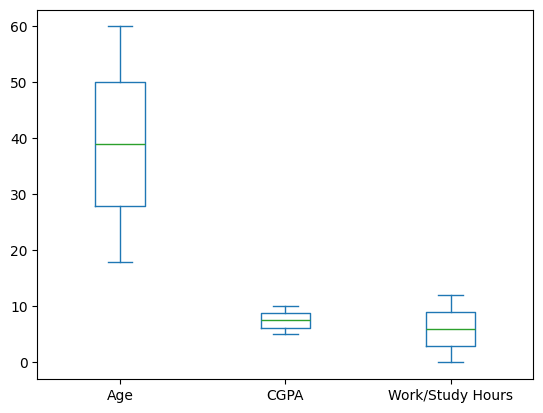

In [93]:
%matplotlib inline
data.plot.box()

# ***4. Data cleaning: outliers and nulls***

***Thanks to the statistical description, it is known that there are no outliers, however there are a lot of nulls.***

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             1883 non-null   category
 5   Academic Pressure                      502 non-null    category
 6   Work Pressure                          2054 non-null   category
 7   CGPA                                   502 non-null    float64 
 8   Study Satisfaction                     502 non-null    category
 9   Job Satisfaction                       2054 non-null   category
 10  Sleep Duration                         2556 non-null   categ

In [95]:
nulos_count = data.isnull().sum()
nulos_percentage = (nulos_count / len(data)) * 100

In [96]:
# Dataframe with the count and percentage of missing values
nulos_df = pd.DataFrame({
    'Nulos': nulos_count,
    'Porcentaje (%)': nulos_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

nulos_df

,Nulos,Porcentaje (%)
CGPA,2054,80.359937
Academic Pressure,2054,80.359937
Study Satisfaction,2054,80.359937
Profession,673,26.330203
Work Pressure,502,19.640063
Job Satisfaction,502,19.640063
Age,0,0.000000
Gender,0,0.000000
City,0,0.000000
Working Professional or Student,0,0.000000


***These data are mostly from professionals, not many students were interviewed. Therefore there is a correlation between the columns of Satisfaction and the columns of Pressure, the professionals that do not have data in 'Academic Pressure' is because they already have in 'Job pressure', and the same happens with satisfaction.***

***For this reason there are also many nulls in CGPA but in this column there is no way to join it with any, so it is best to eliminate it.***

In [97]:
# Null data cleaning: Imputation by mode
from sklearn.impute import SimpleImputer 

var_categoricas = ['Profession']

# #Imputation of categorical variables: mode
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[var_categoricas] = ImpCategorias.fit_transform(data[var_categoricas])

print(ImpCategorias.statistics_)

['Teacher']


In [98]:
nulos_count = data.isnull().sum()
nulos_percentage = (nulos_count / len(data)) * 100

# Dataframe with the count and percentage of missing values
nulos_df = pd.DataFrame({
    'Nulos': nulos_count,
    'Porcentaje (%)': nulos_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

nulos_df

,Nulos,Porcentaje (%)
CGPA,2054,80.359937
Academic Pressure,2054,80.359937
Study Satisfaction,2054,80.359937
Work Pressure,502,19.640063
Job Satisfaction,502,19.640063
Gender,0,0.000000
Age,0,0.000000
Profession,0,0.000000
City,0,0.000000
Working Professional or Student,0,0.000000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             2556 non-null   object  
 5   Academic Pressure                      502 non-null    category
 6   Work Pressure                          2054 non-null   category
 7   CGPA                                   502 non-null    float64 
 8   Study Satisfaction                     502 non-null    category
 9   Job Satisfaction                       2054 non-null   category
 10  Sleep Duration                         2556 non-null   categ

In [100]:
# Fill null values by combining columns
data['Job/Study Satisfaction'] = data['Job Satisfaction'].fillna(data['Study Satisfaction'])
data['Work/Academic Pressure'] = data['Academic Pressure'].fillna(data['Work Pressure'])

# Drop unnecessary columns
data.drop(columns=['Job Satisfaction', 'Study Satisfaction', 'Academic Pressure', 'Work Pressure'], inplace=True)
data.head()

,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Job/Study Satisfaction,Work/Academic Pressure
0,Female,37,Ghaziabad,Working Professional,Teacher,NaN,7-8 hours,Moderate,MA,No,6,2,No,No,4.0,2.0
1,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,3.0,4.0
2,Female,42,Bhopal,Working Professional,Teacher,NaN,5-6 hours,Moderate,M.Com,No,0,2,No,No,3.0,2.0
3,Female,44,Thane,Working Professional,Teacher,NaN,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,5.0,3.0
4,Male,48,Indore,Working Professional,UX/UI Designer,NaN,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,3.0,4.0


In [101]:
nulos_count = data.isnull().sum()
nulos_percentage = (nulos_count / len(data)) * 100

# Dataframe with the count and percentage of missing values
nulos_df = pd.DataFrame({
    'Nulos': nulos_count,
    'Porcentaje (%)': nulos_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

nulos_df

,Nulos,Porcentaje (%)
CGPA,2054,80.359937
Gender,0,0.000000
City,0,0.000000
Age,0,0.000000
Working Professional or Student,0,0.000000
Profession,0,0.000000
Sleep Duration,0,0.000000
Dietary Habits,0,0.000000
Degree,0,0.000000
Have you ever had suicidal thoughts ?,0,0.000000


***CGPA is missing more than 80% of the data, therefore this column will be eliminated.***

***The number of nulls for Profession are less than 30%, therefore they will be imputed by mode.***

***And also verify that the data in the 'Working Professional or Student' and 'Profession' columns match the student records.***

In [102]:
# column to drop because of the high percentage of missing values
data = data.drop(columns='CGPA')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             2556 non-null   object  
 5   Sleep Duration                         2556 non-null   category
 6   Dietary Habits                         2556 non-null   category
 7   Degree                                 2556 non-null   category
 8   Have you ever had suicidal thoughts ?  2556 non-null   category
 9   Work/Study Hours                       2556 non-null   int64   
 10  Financial Stress                       2556 non-null   categ

In [103]:
data['Profession'].value_counts()

Profession
Teacher                   995
Content Writer            116
HR Manager                 84
Pharmacist                 75
Architect                  73
Consultant                 72
Business Analyst           71
Doctor                     66
Entrepreneur               63
Chemist                    59
Chef                       59
Lawyer                     48
Travel Consultant          46
Researcher                 45
Educational Consultant     44
Manager                    42
Judge                      42
Data Scientist             42
Customer Support           41
Marketing Manager          39
Pilot                      39
Finanancial Analyst        38
Financial Analyst          36
Plumber                    35
Software Engineer          34
Electrician                33
Sales Executive            32
Civil Engineer             31
Digital Marketer           31
Mechanical Engineer        30
UX/UI Designer             26
Graphic Designer           26
Accountant                 17

In [104]:
# Ensure that 'Student' is a valid category in 'Profession'
if data['Profession'].dtype.name == 'category':
    if 'Student' not in data['Profession'].cat.categories:
        data['Profession'] = data['Profession'].cat.add_categories(['Student'])

# Set 'Profession' to 'Student' where 'Working Professional or Student' is 'Student'
data.loc[data['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

In [105]:
data['Profession'].value_counts()

Profession
Student                   502
Teacher                   493
Content Writer            116
HR Manager                 84
Pharmacist                 75
Architect                  73
Consultant                 72
Business Analyst           71
Doctor                     66
Entrepreneur               63
Chemist                    59
Chef                       59
Lawyer                     48
Travel Consultant          46
Researcher                 45
Educational Consultant     44
Judge                      42
Manager                    42
Data Scientist             42
Customer Support           41
Pilot                      39
Marketing Manager          39
Finanancial Analyst        38
Financial Analyst          36
Plumber                    35
Software Engineer          34
Electrician                33
Sales Executive            32
Digital Marketer           31
Civil Engineer             31
Mechanical Engineer        30
UX/UI Designer             26
Graphic Designer           26

In [106]:
data['Profession'] = data['Profession'].astype('category')

In [107]:
data.sample(10)

,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Job/Study Satisfaction,Work/Academic Pressure
842,Female,39,Thane,Working Professional,Business Analyst,Less than 5 hours,Unhealthy,MBA,Yes,11,4,No,No,4.0,3.0
2376,Female,58,Chennai,Working Professional,Teacher,5-6 hours,Unhealthy,BCA,Yes,11,4,No,No,3.0,1.0
1895,Female,30,Chennai,Student,Student,More than 8 hours,Unhealthy,B.Com,No,12,1,Yes,No,4.0,5.0
1504,Male,24,Delhi,Working Professional,Financial Analyst,More than 8 hours,Healthy,MBA,Yes,5,1,No,No,1.0,1.0
807,Male,29,Srinagar,Student,Student,More than 8 hours,Moderate,B.Tech,No,6,2,No,No,5.0,4.0
1618,Female,41,Agra,Working Professional,Researcher,More than 8 hours,Unhealthy,MCA,No,11,3,Yes,No,1.0,5.0
2267,Male,47,Pune,Working Professional,Teacher,Less than 5 hours,Healthy,B.Com,No,10,3,Yes,No,2.0,2.0
2153,Male,26,Kanpur,Working Professional,Pilot,5-6 hours,Healthy,BCA,Yes,2,2,No,No,3.0,2.0
1009,Female,54,Patna,Working Professional,Customer Support,Less than 5 hours,Healthy,MA,Yes,1,1,Yes,No,2.0,3.0
513,Female,55,Srinagar,Working Professional,Teacher,5-6 hours,Healthy,MCA,No,6,3,Yes,No,3.0,4.0


In [108]:
from ydata_profiling import ProfileReport

profile_data = ProfileReport(data, minimal=True)
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
# Guardamos en html el perfilado de datos
profile_data.to_file(output_file="data_profile_prepared.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# ***5. Correlation analysis: redundancies among all the variables and irrelevancies with respect to the target variable***

In [110]:
var_drop_first_true = ['Gender', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
var_drop_first_false = ['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress', 'Job/Study Satisfaction', 'Work/Academic Pressure']

data_num = pd.get_dummies(data, columns=var_drop_first_true, drop_first=True, dtype=int)
data_num = pd.get_dummies(data_num, columns=var_drop_first_false, drop_first=False, dtype=int)
data_num.head()

,Age,Work/Study Hours,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,City_Agra,City_Ahmedabad,City_Bangalore,...,Job/Study Satisfaction_1.0,Job/Study Satisfaction_2.0,Job/Study Satisfaction_3.0,Job/Study Satisfaction_4.0,Job/Study Satisfaction_5.0,Work/Academic Pressure_1.0,Work/Academic Pressure_2.0,Work/Academic Pressure_3.0,Work/Academic Pressure_4.0,Work/Academic Pressure_5.0
0,37,6,No,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,60,0,No,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,42,0,No,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,44,1,No,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,48,6,No,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [111]:
# Encoder: transformation of categories to numbers (only for the target variable)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data_num["Depression"] = labelencoder.fit_transform(data_num["Depression"])
data_num.head()

,Age,Work/Study Hours,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,City_Agra,City_Ahmedabad,City_Bangalore,...,Job/Study Satisfaction_1.0,Job/Study Satisfaction_2.0,Job/Study Satisfaction_3.0,Job/Study Satisfaction_4.0,Job/Study Satisfaction_5.0,Work/Academic Pressure_1.0,Work/Academic Pressure_2.0,Work/Academic Pressure_3.0,Work/Academic Pressure_4.0,Work/Academic Pressure_5.0
0,37,6,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,60,0,0,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,42,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,44,1,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,48,6,0,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [112]:
import openpyxl

data_num.correlation = data_num.corr()

# save in excel
#data_num.correlation.to_excel("correlation_matrix.xlsx")

C:\Users\ALEJO\AppData\Local\Temp\ipykernel_18956\1256517459.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_num.correlation = data_num.corr()


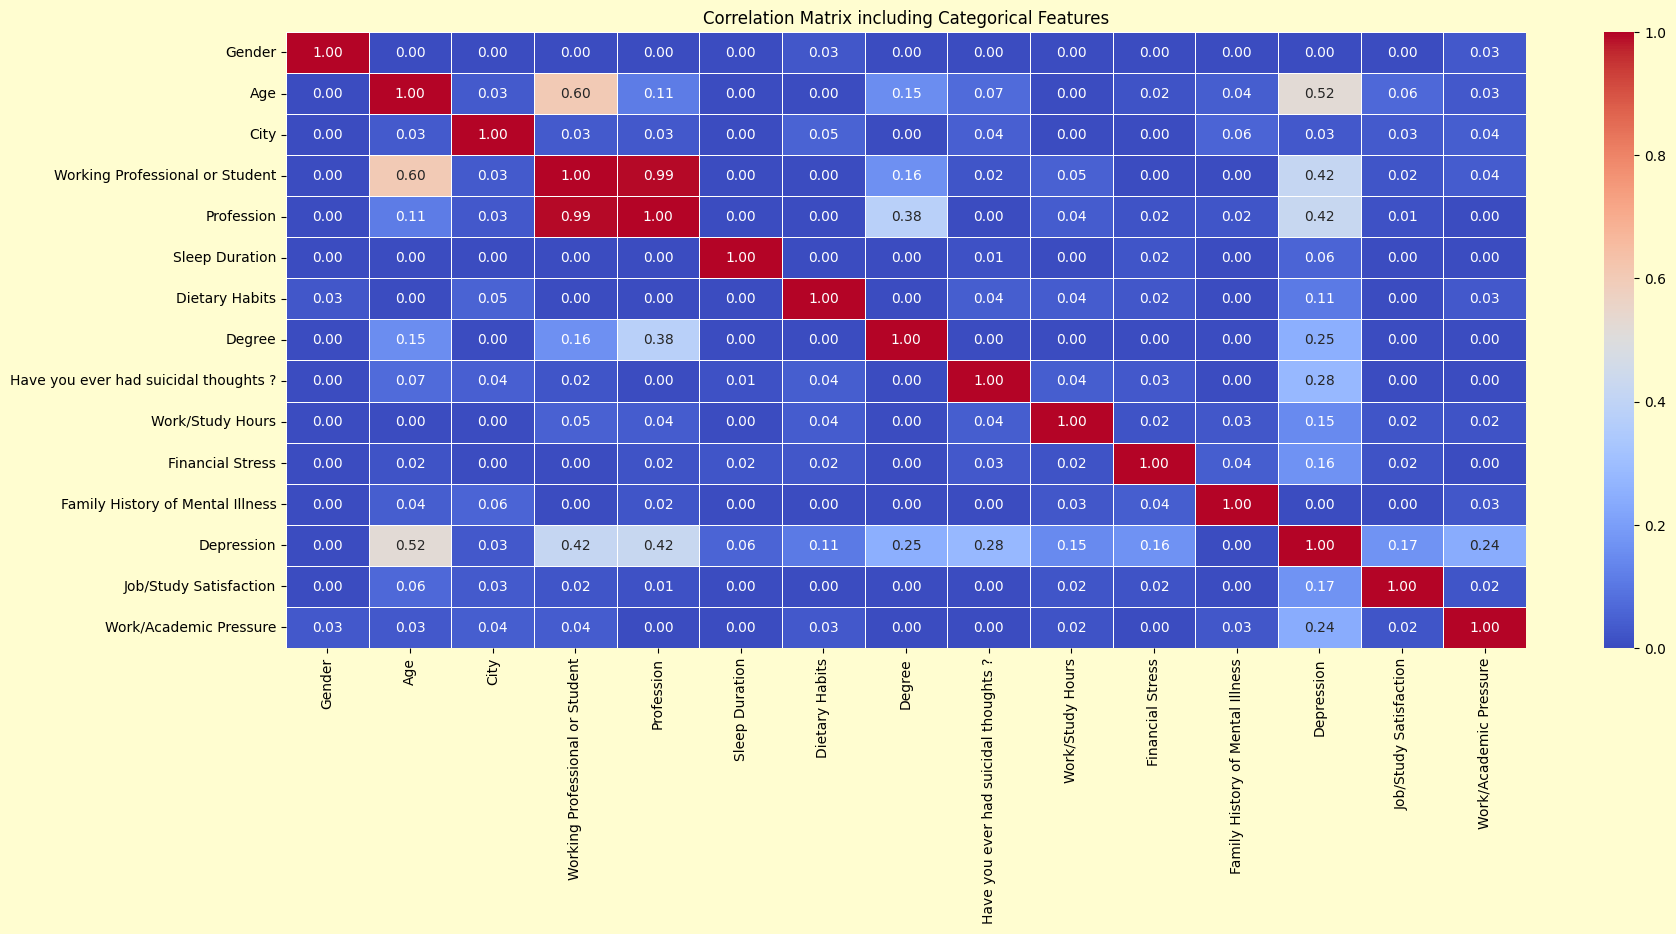

In [113]:
from dython.nominal import associations
import seaborn as sns

associations_df = associations(data, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

***The column 'Working Professional or Student' and 'Profession' have a dangerously high correlation, so one of the two should be deleted because it is redundant to have both.***

In [114]:
# Redundant detection = dangerously high correlations are sought (0.8 - 1.0)

data = data.drop('Profession', axis=1)
data.head()

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Job/Study Satisfaction,Work/Academic Pressure
0,Female,37,Ghaziabad,Working Professional,7-8 hours,Moderate,MA,No,6,2,No,No,4.0,2.0
1,Male,60,Kalyan,Working Professional,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,3.0,4.0
2,Female,42,Bhopal,Working Professional,5-6 hours,Moderate,M.Com,No,0,2,No,No,3.0,2.0
3,Female,44,Thane,Working Professional,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,5.0,3.0
4,Male,48,Indore,Working Professional,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,3.0,4.0


In [115]:
# Irrelevant detection = very low correlations (0.0 - 0.05) are searched

columns = ['City', 'Family History of Mental Illness', 'Gender', 'Sleep Duration']

data = data.drop(columns, axis=1)
data.head()

,Age,Working Professional or Student,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,Job/Study Satisfaction,Work/Academic Pressure
0,37,Working Professional,Moderate,MA,No,6,2,No,4.0,2.0
1,60,Working Professional,Unhealthy,B.Com,Yes,0,4,No,3.0,4.0
2,42,Working Professional,Moderate,M.Com,No,0,2,No,3.0,2.0
3,44,Working Professional,Healthy,MD,Yes,1,2,No,5.0,3.0
4,48,Working Professional,Moderate,BE,Yes,6,5,No,3.0,4.0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    2556 non-null   int64   
 1   Working Professional or Student        2556 non-null   category
 2   Dietary Habits                         2556 non-null   category
 3   Degree                                 2556 non-null   category
 4   Have you ever had suicidal thoughts ?  2556 non-null   category
 5   Work/Study Hours                       2556 non-null   int64   
 6   Financial Stress                       2556 non-null   category
 7   Depression                             2556 non-null   category
 8   Job/Study Satisfaction                 2556 non-null   category
 9   Work/Academic Pressure                 2556 non-null   category
dtypes: category(8), int64(2)
memory usage: 62.4 KB


# ***6. Data balancing - SMOTE***

C:\Users\ALEJO\AppData\Local\Temp\ipykernel_18956\3276880066.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Depression']).plot(kind='bar')


<Axes: xlabel='Depression'>

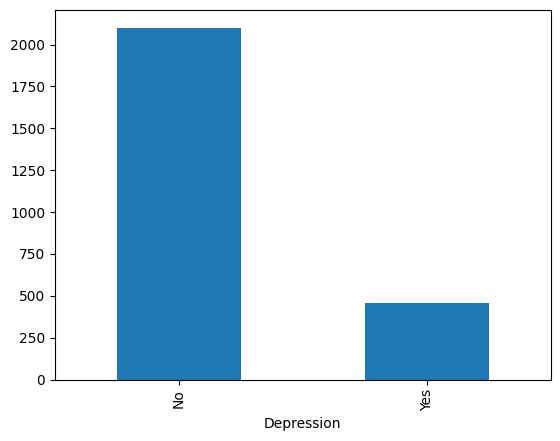

In [117]:
# Target variable
pd.value_counts(data['Depression']).plot(kind='bar')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    2556 non-null   int64   
 1   Working Professional or Student        2556 non-null   category
 2   Dietary Habits                         2556 non-null   category
 3   Degree                                 2556 non-null   category
 4   Have you ever had suicidal thoughts ?  2556 non-null   category
 5   Work/Study Hours                       2556 non-null   int64   
 6   Financial Stress                       2556 non-null   category
 7   Depression                             2556 non-null   category
 8   Job/Study Satisfaction                 2556 non-null   category
 9   Work/Academic Pressure                 2556 non-null   category
dtypes: category(8), int64(2)
memory usage: 62.4 KB


In [119]:
from imblearn.over_sampling import SMOTE, SMOTENC

categorical_columns = [
    'Working Professional or Student', 'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 'Financial Stress', 
    'Job/Study Satisfaction', 'Work/Academic Pressure'
]

# Divides in predictor and target variables
X = data.drop('Depression', axis=1)  # predictor
Y = data['Depression']  # target

# Make sure that all categorical columns are of type category.
for col in categorical_columns:
    X[col] = X[col].astype('category')

# Obtain the indexes of the categorical columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_columns]
print(categorical_indices)

# Configures SMOTENC with the indexes of the categorical columns
sm = SMOTENC(categorical_features=categorical_indices, k_neighbors=2)

# Apply SMOTENC for data balancing
X_bal, Y_bal = sm.fit_resample(X, Y)


[1, 2, 3, 4, 6, 7, 8]


<Axes: xlabel='Depression'>

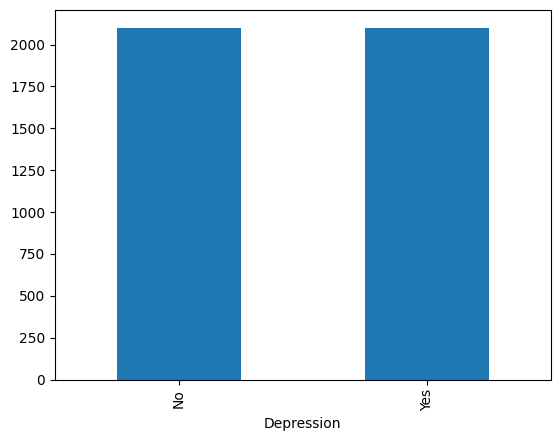

In [120]:
# Create a dataframe with the results
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Depression']=Y_bal
data['Depression'].value_counts().plot(kind='bar')

In [121]:
len(data)

4202

# ***7. Transformation of variable type according to ML method.***

* If the ML method is for categorical variables (trees, bayes, apriori) --> Discretization
* If the ML method is for numerical variables (NN, regressions, SVM, Knn, Kmeans) --> Normalize, dummies to the predictors and labelencoder to the target

## ***7.1 Discretization:*** Transformation from number to category

In [122]:
data.sample(2)

,Age,Working Professional or Student,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Job/Study Satisfaction,Work/Academic Pressure,Depression
2793,25,Student,Unhealthy,B.Ed,No,6,1,2.0,4.0,Yes
2881,31,Student,Moderate,BBA,Yes,3,2,1.0,4.0,Yes


In [123]:
#Cut
data_cat=data.copy()
data_cat['Age'] = pd.cut(data_cat['Age'] , bins=4, right = False)
data_cat['Work/Study Hours'] = pd.cut(data_cat['Work/Study Hours'] , bins=4, right = False)

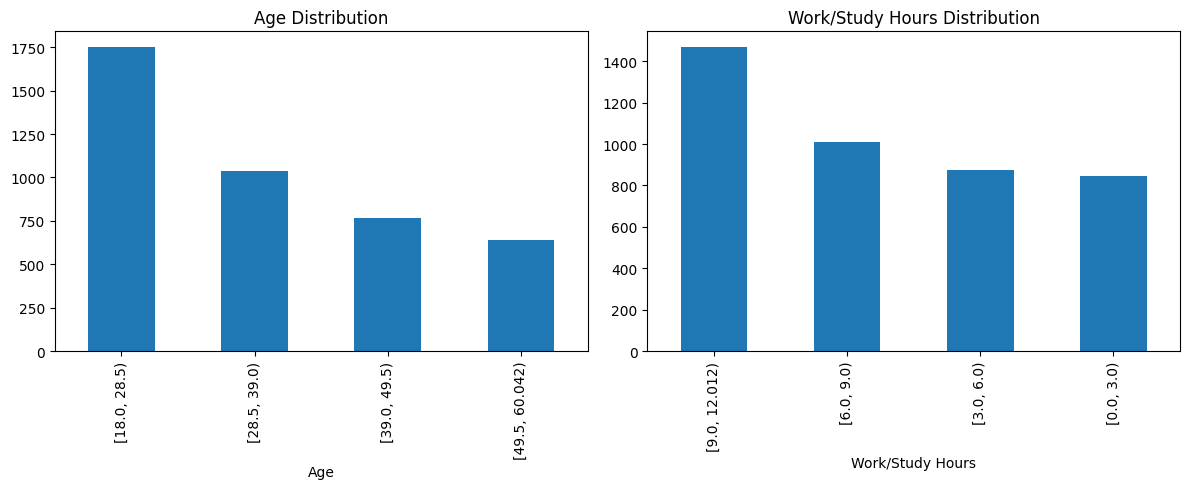

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data_cat['Age'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Age Distribution')

data_cat['Work/Study Hours'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Work/Study Hours Distribution')

plt.tight_layout()
plt.show()

In [125]:
data_cat.sample(5)

,Age,Working Professional or Student,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Job/Study Satisfaction,Work/Academic Pressure,Depression
4084,"[18.0, 28.5)",Student,Healthy,M.Pharm,Yes,"[3.0, 6.0)",4,4.0,5.0,Yes
199,"[49.5, 60.042)",Working Professional,Moderate,M.Pharm,No,"[9.0, 12.012)",5,4.0,1.0,No
2520,"[18.0, 28.5)",Working Professional,Moderate,Class 12,No,"[9.0, 12.012)",3,5.0,1.0,No
2330,"[39.0, 49.5)",Working Professional,Moderate,BSc,Yes,"[3.0, 6.0)",2,1.0,4.0,No
3523,"[18.0, 28.5)",Student,Moderate,M.Pharm,Yes,"[6.0, 9.0)",4,4.0,5.0,Yes


## ***7.2 Normalization of numerical variables***

In [126]:
#Normalization: Only for numerical variables (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[[ 'Age', 'Work/Study Hours']] = min_max_scaler.fit_transform(data[[ 'Age', 'Work/Study Hours']])
data.sample(5)

,Age,Working Professional or Student,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Job/Study Satisfaction,Work/Academic Pressure,Depression
2022,0.023810,Student,Unhealthy,Class 12,No,0.500000,3,4.0,2.0,No
258,0.190476,Student,Unhealthy,Class 12,No,0.750000,1,4.0,4.0,No
3617,0.023810,Student,Moderate,Class 12,Yes,0.333333,4,4.0,4.0,Yes
1345,0.452381,Working Professional,Healthy,PhD,No,0.666667,1,3.0,4.0,No
1888,0.690476,Working Professional,Healthy,PhD,No,0.250000,2,2.0,3.0,No


## ***7.3 Dummies:*** Transformation of categories to numbers

In [128]:
var_drop_first_true = ['Working Professional or Student', 'Have you ever had suicidal thoughts ?']
var_drop_first_false = ['Dietary Habits', 'Degree', 'Financial Stress', 'Job/Study Satisfaction', 'Work/Academic Pressure']

data = pd.get_dummies(data, columns=var_drop_first_true, drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=var_drop_first_false, drop_first=False, dtype=int)

data.sample(5)

,Age,Work/Study Hours,Depression,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_B.Arch,Degree_B.Com,...,Job/Study Satisfaction_1.0,Job/Study Satisfaction_2.0,Job/Study Satisfaction_3.0,Job/Study Satisfaction_4.0,Job/Study Satisfaction_5.0,Work/Academic Pressure_1.0,Work/Academic Pressure_2.0,Work/Academic Pressure_3.0,Work/Academic Pressure_4.0,Work/Academic Pressure_5.0
3605,0.309524,0.250000,Yes,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3579,0.190476,0.000000,Yes,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
730,0.761905,0.416667,No,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3275,0.119048,0.250000,Yes,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2720,0.000000,0.666667,Yes,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## ***7.4 Encoder:*** Only for the target variable

In [129]:
# Encoder: Transformation of categories to numbers (only for the target variable)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Depression"] = labelencoder.fit_transform(data["Depression"])
data.sample(5)

,Age,Work/Study Hours,Depression,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_B.Arch,Degree_B.Com,...,Job/Study Satisfaction_1.0,Job/Study Satisfaction_2.0,Job/Study Satisfaction_3.0,Job/Study Satisfaction_4.0,Job/Study Satisfaction_5.0,Work/Academic Pressure_1.0,Work/Academic Pressure_2.0,Work/Academic Pressure_3.0,Work/Academic Pressure_4.0,Work/Academic Pressure_5.0
13,0.785714,0.666667,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3749,0.023810,0.416667,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1094,0.357143,0.583333,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2650,0.095238,0.500000,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2823,0.309524,0.250000,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


# ***8. Save prepared data***

In [130]:
data_cat.to_csv('../Data/categorical_data.csv', index=False)

In [131]:
data.to_csv('../Data/numeric_data.csv', index=False)